# Practice notebook for pandas operations

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

## Setting defaults

In [2]:
DATA_PATH = './Data/'
PLOTS_PATH = './plots/'
FILE_NAME = 'bmbf-answers.csv'
LEFT_SERVER_FILE = 'leftServerBmbfFiles.csv'
RIGHT_SERVER_FILE = 'rightServerBmbfFiles.csv'

In [3]:
# make folder for plots
os.makedirs(os.path.dirname(PLOTS_PATH), exist_ok=True)

## Reading questionnaire data

In [4]:
questionnaire_df = pd.read_csv(f'{DATA_PATH}{FILE_NAME}')

In [5]:
questionnaire_df.head()

,id,uid,date,Intention to Use 1,Perceived Usefulness 4,Perceived Ease of Use 2,Trust,Sex,Age,Aviophobia,Driving Frequency,Playing Hours,VR Playing Frequency
0,7,efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,weiblich,51,1,32,0,unter 10
1,8,7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,männlich,52,0,34,0,Ein mal
2,9,fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,männlich,49,0,30,0,Noch nie
3,10,132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,männlich,47,0,30,8,Ein mal
4,11,3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,männlich,52,0,32,0,Ein mal


In [6]:
questionnaire_df.columns

Index(['id', 'uid', 'date', 'Intention to Use 1', 'Perceived Usefulness 4',
       'Perceived Ease of Use 2', 'Trust', 'Sex', 'Age', 'Aviophobia',
       'Driving Frequency', 'Playing Hours', 'VR Playing Frequency'],
      dtype='object')

In [7]:
questionnaire_df.shape

(819, 13)

In [8]:
questionnaire_df.isna().sum()

id                         0
uid                        0
date                       0
Intention to Use 1         0
Perceived Usefulness 4     0
Perceived Ease of Use 2    0
Trust                      0
Sex                        0
Age                        0
Aviophobia                 0
Driving Frequency          0
Playing Hours              0
VR Playing Frequency       0
dtype: int64

In [9]:
questionnaire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       819 non-null    int64 
 1   uid                      819 non-null    object
 2   date                     819 non-null    object
 3   Intention to Use 1       819 non-null    int64 
 4   Perceived Usefulness 4   819 non-null    int64 
 5   Perceived Ease of Use 2  819 non-null    int64 
 6   Trust                    819 non-null    int64 
 7   Sex                      819 non-null    object
 8   Age                      819 non-null    int64 
 9   Aviophobia               819 non-null    int64 
 10  Driving Frequency        819 non-null    int64 
 11  Playing Hours            819 non-null    int64 
 12  VR Playing Frequency     819 non-null    object
dtypes: int64(9), object(4)
memory usage: 83.3+ KB


### Basic formatting

In [10]:
questionnaire_df['date'] = (pd.to_datetime(questionnaire_df['date'], infer_datetime_format=True))

In [11]:
questionnaire_df.set_index('uid', inplace=True)

In [12]:
questionnaire_df = questionnaire_df.drop(columns=['id', 'Aviophobia', 'Playing Hours', 'VR Playing Frequency'])

In [13]:
questionnaire_df.head()

,date,Intention to Use 1,Perceived Usefulness 4,Perceived Ease of Use 2,Trust,Sex,Age,Driving Frequency
uid,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,weiblich,51,32
7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,männlich,52,34
fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,männlich,49,30
132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,männlich,47,30
3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,männlich,52,32


In [14]:
leftfiles = pd.read_csv(f'{DATA_PATH}{LEFT_SERVER_FILE}', header=None)
rightfiles = pd.read_csv(f'{DATA_PATH}{RIGHT_SERVER_FILE}', header=None)

filenames_df = pd.concat([leftfiles, rightfiles], ignore_index=True) 

In [15]:
filenames_df.rename(columns={0: 'file_name'}, inplace=True)
filenames_df

,file_name
0,Path_ MS Wissenschaft-AVAS-00c831eddb5745e59cf...
1,Path_ MS Wissenschaft-AVAS-023a7f7f06484bada49...
2,Path_ MS Wissenschaft-AVAS-0247a28d6ddb4208bdc...
3,Path_ MS Wissenschaft-AVAS-04a271023f814ee9b27...
4,Path_ MS Wissenschaft-AVAS-0948a78440c149799ae...
...,...
1399,test (copy 5)
1400,test (copy 6)
1401,test (copy 7)
1402,test (copy 8)


In [16]:
filenames_df = filenames_df.file_name.str.split('-', expand=True)
filenames_df.head()

,0,1,2
0,Path_ MS Wissenschaft,AVAS,00c831eddb5745e59cffba23918376c8.raw
1,Path_ MS Wissenschaft,AVAS,023a7f7f06484bada49f4d56dad4e090.raw
2,Path_ MS Wissenschaft,AVAS,0247a28d6ddb4208bdcca6c0adf25578.raw
3,Path_ MS Wissenschaft,AVAS,04a271023f814ee9b27bb1338186344c.raw
4,Path_ MS Wissenschaft,AVAS,0948a78440c149799aee01209da977c5.raw


In [17]:
filenames_df['uid'] = filenames_df[2].str.replace('.raw', '')
filenames_df['condition'] = filenames_df[1]

<ipython-input-17-a93901280b41>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  filenames_df['uid'] = filenames_df[2].str.replace('.raw', '')


In [18]:
filenames_df = filenames_df.drop(columns=[0,1,2])

In [19]:
filenames_df.isna().sum()

uid          20
condition    20
dtype: int64

In [20]:
# drop nans from both columns
filenames_df = filenames_df.dropna(subset=['uid', 'condition'])

In [21]:
filenames_df.set_index('uid', inplace=True)

In [22]:
filenames_df.head()

,condition
uid,
00c831eddb5745e59cffba23918376c8,AVAS
023a7f7f06484bada49f4d56dad4e090,AVAS
0247a28d6ddb4208bdcca6c0adf25578,AVAS
04a271023f814ee9b27bb1338186344c,AVAS
0948a78440c149799aee01209da977c5,AVAS


In [23]:
questionnaire_df = questionnaire_df.merge(filenames_df, on='uid',)
display(questionnaire_df)

,date,Intention to Use 1,Perceived Usefulness 4,Perceived Ease of Use 2,Trust,Sex,Age,Driving Frequency,condition
uid,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,2019-07-02 11:58:23,60,80,30,91,weiblich,51,32,RadioTalk
7be560561f2141518bd4f6c2c3c9f487,2019-07-02 12:07:53,56,62,36,85,männlich,52,34,AVAS
fa0885937e114e9a907a5a4feda5798b,2019-07-02 12:09:22,29,79,27,52,männlich,49,30,TaxiDriver
132256b042674a5f8ed249578fc624b4,2019-07-02 12:45:58,100,96,100,83,männlich,47,30,TaxiDriver
3b057c2796314ef6a61de34c28d63e03,2019-07-02 12:51:29,68,78,37,50,männlich,52,32,RadioTalk
...,...,...,...,...,...,...,...,...,...
ed32759c3cf1423bab04a9879a0a5b18,2019-09-20 14:23:35,75,75,75,75,weiblich,57,39,RadioTalk
eadcb5eadeef46689d852bc2327c5706,2019-09-23 11:06:54,73,52,50,81,männlich,66,48,TaxiDriver
9ac84825faeb48d484192ebd10759d74,2019-09-23 11:07:25,25,50,6,51,weiblich,59,41,TaxiDriver


In [26]:
questionnaire_df.Sex.value_counts(normalize=True)

männlich        0.537897
weiblich        0.382641
keine Angabe    0.042787
intersex        0.036675
Name: Sex, dtype: float64

In [27]:
questionnaire_df.condition.value_counts(normalize=True)

AVAS          0.354523
RadioTalk     0.326406
TaxiDriver    0.319071
Name: condition, dtype: float64

In [28]:
questionnaire_df.Sex = questionnaire_df.Sex.map({
    'männlich': 'male',
    'weiblich' : 'female',
    'intersex' : 'intesex',
    'keine Angabe' : 'na'
})

In [31]:
questionnaire_df = questionnaire_df.rename(columns={
    'Intention to Use 1':'Intention',
    'Perceived Usefulness 4' : 'Usefulness',
    'Perceived Ease of Use 2' : 'Ease',
    'Trust' :'Trust'
})

In [38]:
questionnaire_df.to_csv('questionnaire_cleaned.csv')

<AxesSubplot:ylabel='Frequency'>

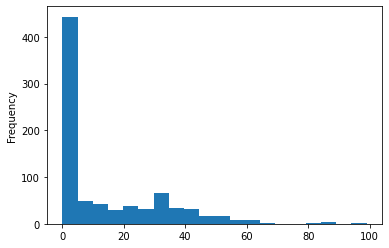

In [40]:
questionnaire_df['Driving Frequency'].plot(kind='hist', bins=20)

In [41]:
questionnaire_df['is_regular_driver'] = False
questionnaire_df.loc[questionnaire_df['Driving Frequency'] >=5, 'is_regular_driver'] = True

In [42]:
questionnaire_df.head()

,Intention,Usefulness,Ease,Trust,Sex,Age,Driving Frequency,condition,is_regular_driver
uid,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,60,80,30,91,female,51,32,RadioTalk,True
7be560561f2141518bd4f6c2c3c9f487,56,62,36,85,male,52,34,AVAS,True
fa0885937e114e9a907a5a4feda5798b,29,79,27,52,male,49,30,TaxiDriver,True
132256b042674a5f8ed249578fc624b4,100,96,100,83,male,47,30,TaxiDriver,True
3b057c2796314ef6a61de34c28d63e03,68,78,37,50,male,52,32,RadioTalk,True


In [44]:
questionnaire_df.groupby('Sex').Trust.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,313.0,69.191693,28.192931,0.0,50.00,75.0,99.00,100.0
intesex,30.0,52.933333,32.222217,0.0,29.75,50.0,77.75,100.0
male,440.0,75.422727,26.139863,0.0,50.00,84.0,100.00,100.0
na,35.0,63.771429,30.010866,0.0,50.00,55.0,100.00,100.0


In [47]:
questionnaire_df.groupby('condition').Ease.describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
AVAS,290.0,69.534483,27.127799,0.0,50.0,75.0,99.0,100.0
RadioTalk,267.0,66.719101,30.027677,0.0,50.0,70.0,100.0,100.0
TaxiDriver,261.0,66.785441,27.797204,0.0,50.0,68.0,100.0,100.0


In [49]:
questionnaire_df.head() #wide form dataframe

,Intention,Usefulness,Ease,Trust,Sex,Age,Driving Frequency,condition,is_regular_driver
uid,,,,,,,,,
efb7844a4df8430f9d1c2f72babe5e86,60,80,30,91,female,51,32,RadioTalk,True
7be560561f2141518bd4f6c2c3c9f487,56,62,36,85,male,52,34,AVAS,True
fa0885937e114e9a907a5a4feda5798b,29,79,27,52,male,49,30,TaxiDriver,True
132256b042674a5f8ed249578fc624b4,100,96,100,83,male,47,30,TaxiDriver,True
3b057c2796314ef6a61de34c28d63e03,68,78,37,50,male,52,32,RadioTalk,True


In [51]:
questionnaire_df_melt = pd.melt(
    questionnaire_df.reset_index(),
    id_vars=['uid', 'condition', 'Age', 'Sex', 'is_regular_driver'],
    value_vars=['Intention','Usefulness', 'Ease', 'Trust'],
    var_name='TAM',
    value_name='Score'
)
questionnaire_df_melt.head() # long form dataframe

,uid,condition,Age,Sex,is_regular_driver,TAM,Score
0,efb7844a4df8430f9d1c2f72babe5e86,RadioTalk,51,female,True,Intention,60
1,7be560561f2141518bd4f6c2c3c9f487,AVAS,52,male,True,Intention,56
2,fa0885937e114e9a907a5a4feda5798b,TaxiDriver,49,male,True,Intention,29
3,132256b042674a5f8ed249578fc624b4,TaxiDriver,47,male,True,Intention,100
4,3b057c2796314ef6a61de34c28d63e03,RadioTalk,52,male,True,Intention,68


In [55]:
questionnaire_df_melt.tail()

,uid,condition,Age,Sex,is_regular_driver,TAM,Score
3267,ed32759c3cf1423bab04a9879a0a5b18,RadioTalk,57,female,True,Trust,75
3268,eadcb5eadeef46689d852bc2327c5706,TaxiDriver,66,male,True,Trust,81
3269,9ac84825faeb48d484192ebd10759d74,TaxiDriver,59,female,True,Trust,51
3270,ca40e5d5fce94763b84a352ce4739778,TaxiDriver,67,male,True,Trust,27
3271,2065be8ac47247318e6cc0a52aa6380f,TaxiDriver,49,male,True,Trust,24


In [56]:
questionnaire_df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uid                3272 non-null   object
 1   condition          3272 non-null   object
 2   Age                3272 non-null   int64 
 3   Sex                3272 non-null   object
 4   is_regular_driver  3272 non-null   bool  
 5   TAM                3272 non-null   object
 6   Score              3272 non-null   int64 
dtypes: bool(1), int64(2), object(4)
memory usage: 156.7+ KB


In [54]:
questionnaire_df_melt.TAM.value_counts()

Trust         818
Usefulness    818
Ease          818
Intention     818
Name: TAM, dtype: int64

In [53]:
questionnaire_df_melt.groupby(['Sex', 'TAM']).Score.describe()

count       mean        std  min    25%   50%     75%  \
Sex     TAM                                                                 
female  Ease        313.0  62.335463  28.498638  0.0  50.00  61.0   88.00   
        Intention   313.0  59.910543  29.559886  0.0  50.00  56.0   83.00   
        Trust       313.0  69.191693  28.192931  0.0  50.00  75.0   99.00   
        Usefulness  313.0  62.051118  28.211835  0.0  50.00  60.0   86.00   
intesex Ease         30.0  68.866667  33.981469  0.0  50.00  82.5  100.00   
        Intention    30.0  60.333333  35.865970  0.0  39.50  50.0   99.25   
        Trust        30.0  52.933333  32.222217  0.0  29.75  50.0   77.75   
        Usefulness   30.0  67.566667  35.625140  0.0  50.00  77.5  100.00   
male    Ease        440.0  72.840909  26.191291  0.0  50.00  77.0  100.00   
        Intention   440.0  70.729545  29.220738  0.0  50.00  77.0  100.00   
        Trust       440.0  75.422727  26.139863  0.0  50.00  84.0  100.00   
        Usefulness  440.0  72.622727  27.329399  0.0  50.00  77.0  100.00   
na      Ease         35.0  50.942857  32.690116  0.0  39.00  50.0   73.00   
        Intention    35.0  58.685714  32.666561  0.0  50.00  50.0   93.00   
        Trust        35.0  63.771429  30.010866  0.0  50.00  55.0  100.00   
        Usefulness   35.0  54.685714  33.202384  0.0  50.00  50.0   79.50   

                      max  
Sex     TAM                
female  Ease        100.0  
        Intention   100.0  
        Trust       100.0  
        Usefulness  100.0  
intesex Ease        100.0  
        Intention   100.0  
        Trust       100.0  
        Usefulness  100.0  
male    Ease        100.0  
        Intention   100.0  
        Trust       100.0  
        Usefulness  100.0  
na      Ease        100.0  
        Intention   100.0  
        Trust       100.0  
        Usefulness  100.0

C:\Users\lonesome\anaconda3\envs\acc_conda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


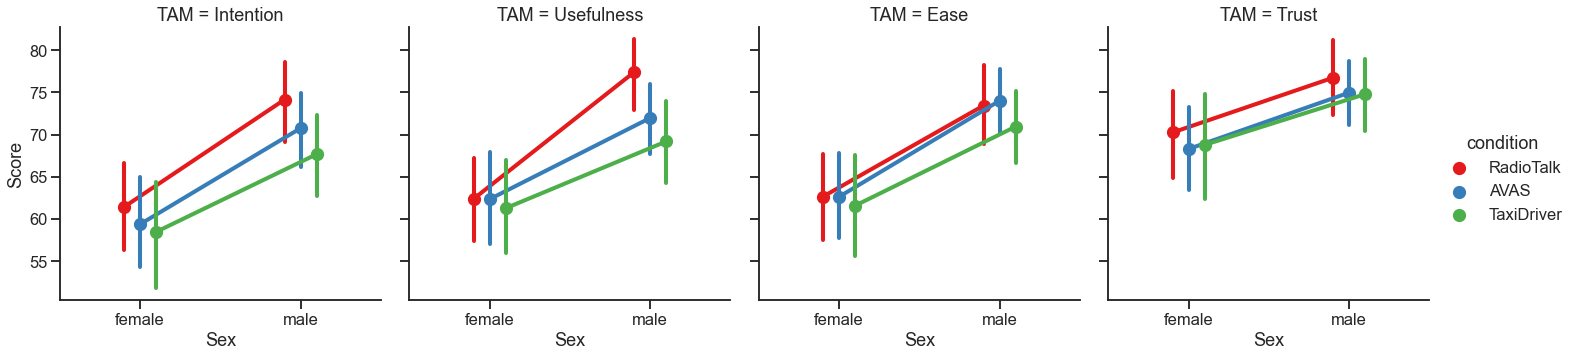

In [58]:
sns.set(context='talk', style='ticks', palette='Set1',)

tmpdf = questionnaire_df_melt.query('Sex in ["male", "female"]')

ax = sns.factorplot(
    data=tmpdf,
    x='Sex',
    y='Score',
    col='TAM',
    hue='condition',
    ci=95,
    dodge=0.2
    
)